In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
mdc = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/MARVEL%20vs.%20DC%20-%20IMDB%20%26%20ROTTEN%20TOMATOES/mdc.csv', sep = ',', encoding = 'Latin-1')
mdc.head()

,Unnamed: 0,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
0,1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1
1,2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",13,78,38,50000,MARVEL,2
2,3,Blade,1998,"Action, Horror, Sci-Fi",120,R,7.1,251243,70090000,Stephen Norrington,"Stephen Norrington,Wesley Snipes,Stephen Dorff...","A half-vampire, half-mortal man becomes a prot...","Though some may find the plot a bit lacking, B...",55,103,78,250000,MARVEL,3
3,4,X-Men,2000,"Action, Adventure, Sci-Fi",104,PG-13,7.4,580354,157300000,Bryan Singer,"Bryan Singer,Patrick Stewart,Hugh Jackman,Ian ...",In a world where mutants (evolved super-powere...,"Faithful to the comics and filled with action,...",82,174,83,250000,MARVEL,4
4,5,Blade II,2002,"Action, Fantasy, Horror",117,R,6.7,203813,82350000,Guillermo del Toro,"Guillermo del Toro,Wesley Snipes,Kris Kristoff...",Blade forms an uneasy alliance with the vampir...,Though Blade II offers more of what worked in ...,57,150,68,250000,MARVEL,5


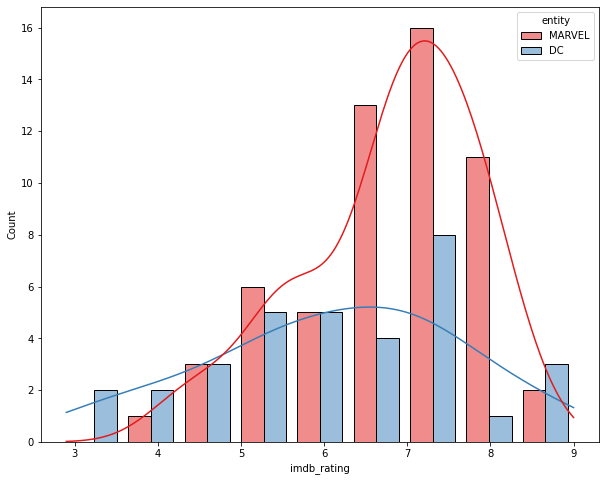

In [5]:
fig = plt.figure(figsize = (10,8))
sns.histplot(data = mdc, 
             x = 'imdb_rating', 
             kde = True, 
             hue = 'entity', 
             multiple = 'dodge', 
             shrink = 0.8, 
             palette = 'Set1');

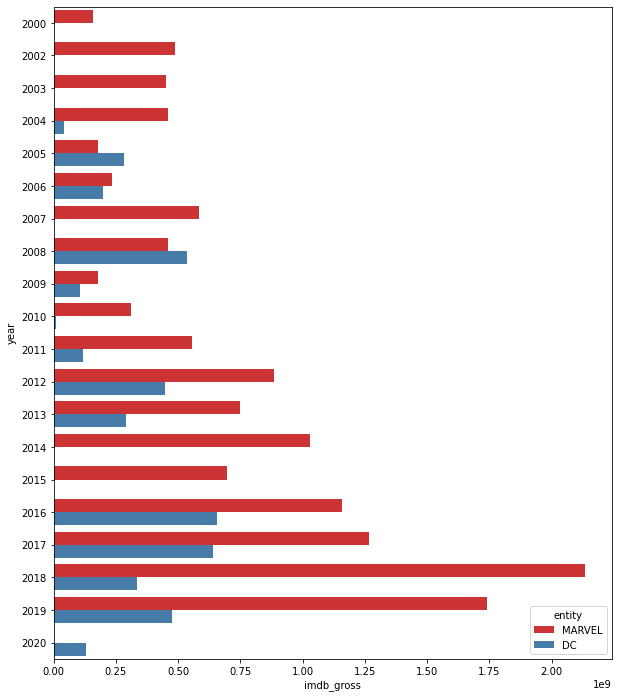

In [6]:
filterdata = mdc[mdc['year'] >= 2000]
fig = plt.figure(figsize = (10,12))
sns.barplot(data = filterdata, 
            x = 'imdb_gross', 
            y = 'year', 
            hue = 'entity', 
            ci = None, 
            estimator = sum, 
            palette = 'Set1',
            orient = 'h');

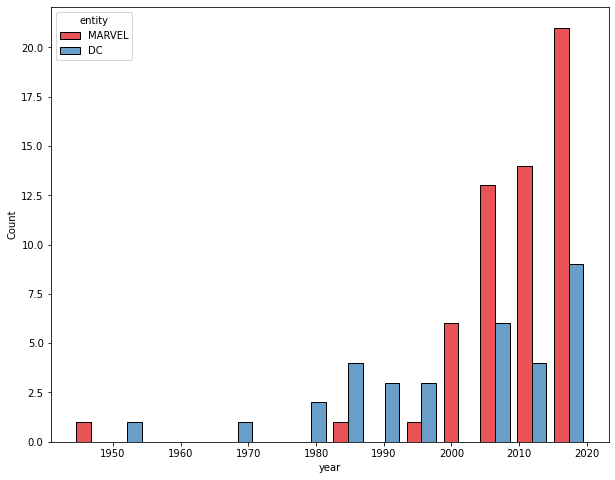

In [7]:
fig = plt.figure(figsize = (10,8))
sns.histplot(data = mdc, x = 'year', 
             hue = 'entity', 
             multiple = 'dodge', 
             shrink = 0.8, 
             palette = 'Set1');

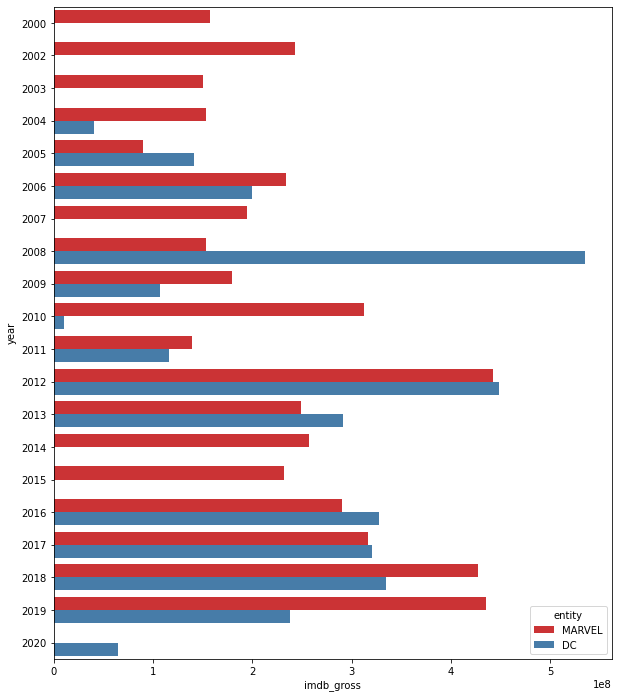

In [8]:
filterdata = mdc[mdc['year'] >= 2000]
fig = plt.figure(figsize = (10,12))
sns.barplot(data = filterdata, 
            x = 'imdb_gross', 
            y = 'year', 
            hue = 'entity', 
            ci = None, 
            palette = 'Set1',
            orient = 'h');

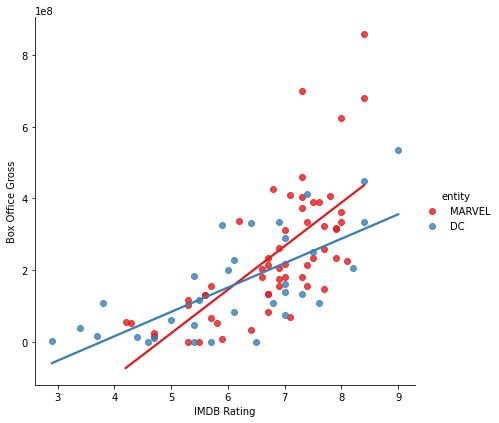

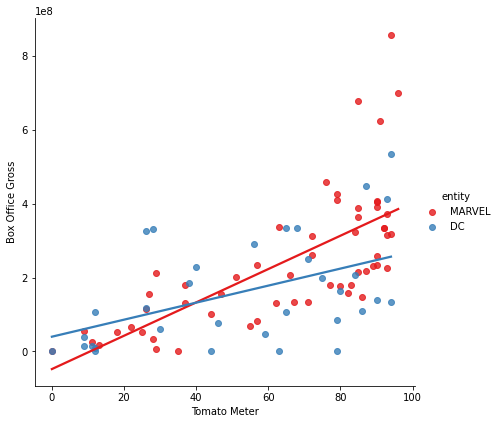

In [9]:
ax1 = sns.lmplot(data = mdc,
           x = 'imdb_rating', 
           y = 'imdb_gross', 
           ci = None, 
           hue = 'entity', height = 6, 
           palette = 'Set1');
ax1.set_axis_labels("IMDB Rating", "Box Office Gross")

ax2 = sns.lmplot(data = mdc, 
           x = 'tomato_meter', 
           y = 'imdb_gross', 
           ci = None, 
           hue = 'entity', height = 6, 
           palette = 'Set1');
ax2.set_axis_labels("Tomato Meter", "Box Office Gross")

In [10]:
mvl = mdc[mdc['entity'] == 'MARVEL']
dc = mdc[mdc['entity'] == 'DC']

print('Pearson correlation coefficients for Marvel films')
print(mvl[['imdb_gross','imdb_rating','tomato_meter']].corr().round(3))
print('-----------------------------------------------------')
print('Pearson correlation coefficients for DC films')
print(dc[['imdb_gross','imdb_rating','tomato_meter']].corr().round(3))

Pearson correlation coefficients for Marvel films
              imdb_gross  imdb_rating  tomato_meter
imdb_gross         1.000        0.693         0.700
imdb_rating        0.693        1.000         0.891
tomato_meter       0.700        0.891         1.000
-----------------------------------------------------
Pearson correlation coefficients for DC films
              imdb_gross  imdb_rating  tomato_meter
imdb_gross         1.000        0.704         0.477
imdb_rating        0.704        1.000         0.800
tomato_meter       0.477        0.800         1.000
